In [1]:
import glob
import numpy as np
import pandas as pd
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import networkx as nx

np.random.seed(42)
sns.set(font_scale = 2)

In [2]:
path = ".\FDSII_DataSets"
files = glob.glob(path + "/*.csv")

data = []
country_names = []

for f in files:
    df = pd.read_csv(f)
    df[df == ".."] = np.NaN
    df.iloc[:,2:7] = df.iloc[:,2:7].astype('float64')
    country_names.append(df["Country"][0])
    
    # fill missing data with mean across years
    mu = df.iloc[:,2:7].mean(axis = 1)
    for i in range(len(mu)):
        df.loc[i, df.loc[i].isnull()] = mu[i]
        
    data.append(df)
    
country_number = len(country_names)
indicators = df["Indicator"].tolist()

# combined df
df = pd.DataFrame(columns = indicators)
for i in range(country_number):
    df.loc[i] = data[i]["2017"].tolist()
    
# rename row and column
df.index = country_names
# display(df.describe())
df.columns = ["X%u" %(i+1) for i in range(len(indicators))]

# fill in missing data by sampling
for i in range(14):
    series = df.iloc[:,i]
    n = sum(series.isnull())
    sample = np.random.choice(series.dropna(), size = n, replace = True)
    df.iloc[:,i][series.isnull()] = sample

df.describe()

c:\users\pangk\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,145.918367,48.979592,51.020408,81.746429,76.219388,28.289456,89.905442,89.580272,7.702551,17.077551,138.536461,111.685714,1692.632653,10198.229592
std,224.888105,1.282735,1.282735,3.082570,4.451414,2.279383,15.892752,14.094977,4.300582,9.763863,739.066879,18.539710,5351.729307,24588.052864
min,3.000000,46.000000,49.000000,75.350000,67.000000,22.900000,22.600000,19.900000,1.900000,2.600000,0.887300,76.400000,2.000000,10.000000
25%,46.000000,48.000000,50.000000,79.200000,72.500000,27.400000,88.000000,89.000000,4.900000,10.400000,0.887300,98.100000,157.000000,605.000000
50%,93.000000,49.000000,51.000000,82.600000,78.200000,28.900000,96.000000,95.000000,6.600000,14.400000,1.000000,112.600000,433.000000,1310.000000
75%,134.000000,50.000000,52.000000,84.200000,80.200000,29.600000,97.300000,98.000000,9.400000,20.500000,8.269400,118.400000,907.000000,3065.000000
max,1481.000000,51.000000,54.000000,86.800000,82.700000,32.900000,100.000000,100.000000,21.500000,43.600000,5167.279800,176.500000,37133.000000,108394.000000


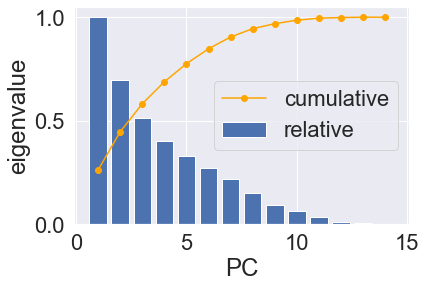

In [3]:
# standardize
df_std = df.divide(df.std())
# display(df_std.describe())

# eigenvalue eigenvector
evalue, evector = np.linalg.eig(df_std.cov())

# scree plot
plt.bar(range(1,len(evalue)+1), evalue/evalue[0])
plt.plot(range(1,len(evalue)+1), np.cumsum(evalue)/np.sum(evalue), '-o', color = 'orange')
plt.xlabel("PC")
plt.ylabel("eigenvalue")
plt.legend(["cumulative", "relative"])
plt.show()

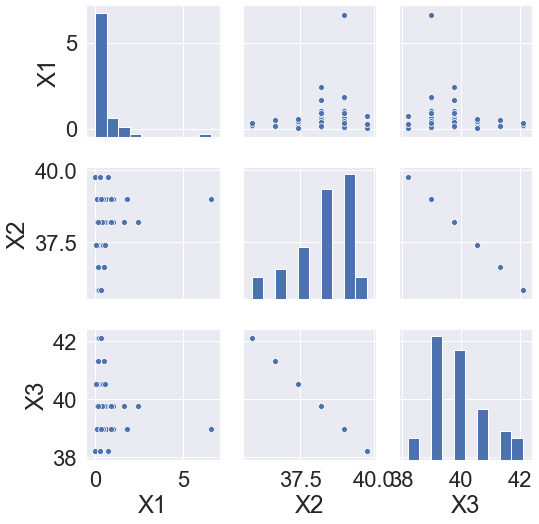

In [4]:
sns.pairplot(df_std[["X1", "X2", "X3"]])

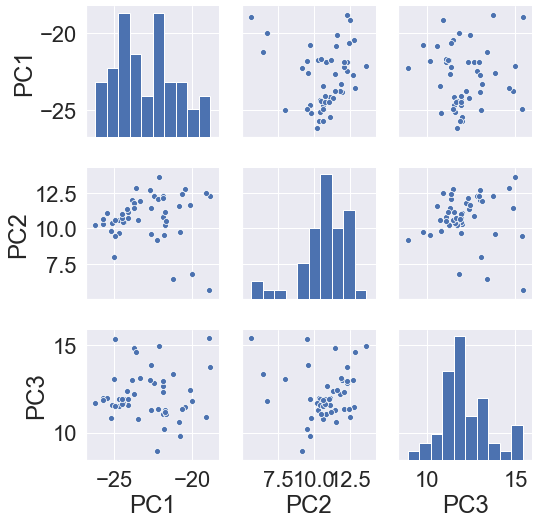

In [5]:
proj = np.dot(df_std, evector)
# proj = np.dot(df_std, np.transpose(np.matrix(evector)))
df_pc = pd.DataFrame(proj, index = country_names, columns = ["PC%u" %(i+1) for i in range(len(indicators))])

# plt.scatter(df_pc["Y1"], df_pc["Y2"])
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.axis("square")
# plt.show()

sns.pairplot(df_pc[["PC1", "PC2", "PC3"]])

Text(54.17384615384624, 0.5, 'PC')

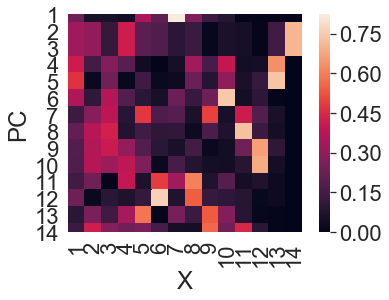

In [6]:
ax = sns.heatmap(np.abs(evector), 
                 square = True, 
                 xticklabels = range(1,15), 
                 yticklabels = range(1,15))
ax.set_xlabel("X")
ax.set_ylabel("PC")

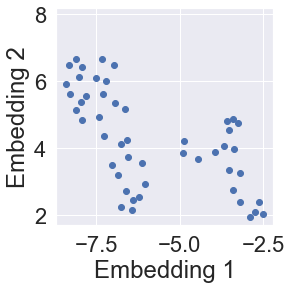

In [7]:
# umap
reducer = umap.UMAP(n_neighbors = 7, random_state = 42)#, min_dist = 0)
embedding = reducer.fit_transform(df_std)

# sns.set(font_scale = 1.5)
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel("Embedding 1")
plt.ylabel("Embedding 2")
plt.axis("square")
plt.show()

c:\users\pangk\appdata\local\programs\python\python36\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\appdata\local\programs\python\python36\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
c:\users\pangk\appdata\local\programs\python\python36\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File 

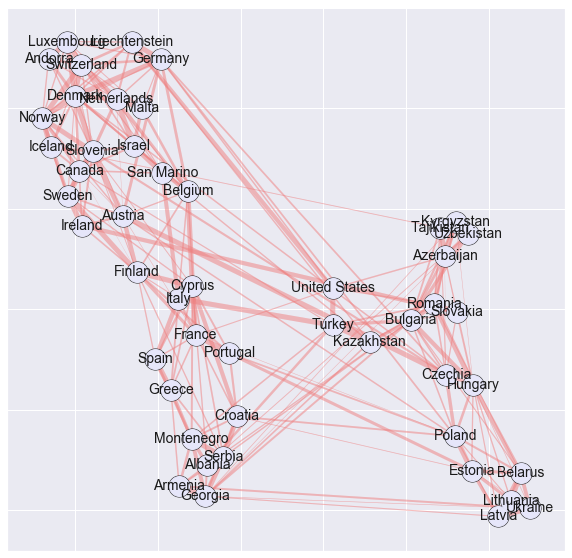

In [8]:
A = umap.umap_.fuzzy_simplicial_set(X = df_std.to_numpy(), 
                                    n_neighbors = 7, 
                                    random_state = np.random, 
                                    metric = 'euclidean')

G = nx.from_numpy_matrix(np.matrix(A.toarray()), create_using = nx.DiGraph)

# layout = nx.spring_layout(G, seed = 42)
layout = {}
for i in range(len(embedding)):
    layout[i] = embedding[i]

plt.figure(1, figsize = (10,10)) 
nx.draw_networkx_nodes(G, layout, node_size = 400, node_color = 'k', linewidths = 2)
nx.draw_networkx_nodes(G, layout, node_size = 400, node_color = 'lavender')

label = {}
for i in range(len(G.nodes())):
    label[i] = country_names[i]
nx.draw_networkx_labels(G, layout, label, font_size = 14)

for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, layout, 
                           edgelist = [(u, v)], 
                           width = d['weight']*5, 
                           alpha = 0.3,
                           arrows = False,
                           edge_color = 'lightcoral')
plt.show()

NameError: name 'colors' is not defined

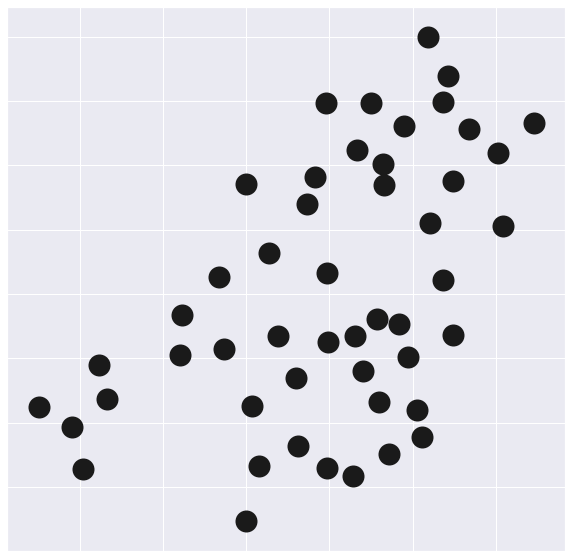

In [9]:

layout = nx.spring_layout(G, seed = 42)

plt.figure(1, figsize = (10,10)) 
nx.draw_networkx_nodes(G, layout, node_size = 400, node_color = 'k', linewidths = 2)
nx.draw_networkx_nodes(G, layout, node_size = 400, node_color = colors)
nx.draw_networkx_labels(G, layout, label, font_size = 14)

for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, layout, 
                           edgelist = [(u, v)], 
                           width = d['weight']*5, 
                           alpha = d['weight']*0.5,
                           arrows = False,
                           edge_color = 'k')
plt.show()

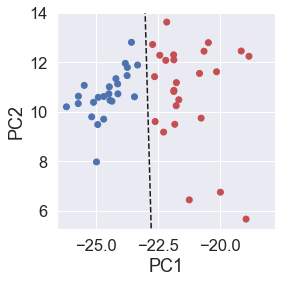

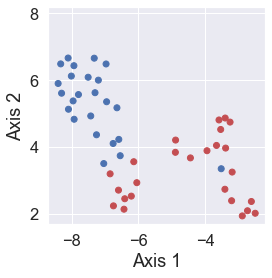

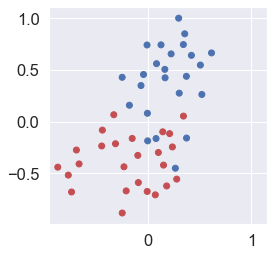

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_std)
labels = kmeans.predict(df_std)

centroids = kmeans.cluster_centers_
a, b = np.dot(centroids, evector)
mid_point = (a[0:2] + b[0:2])/2
slope = (a[1] - b[1])/(a[0] - b[0])
slope = -1/slope
x = np.array([-22, -24])
y = slope*(x-mid_point[0])+mid_point[1]

colors = []
for i in labels:
    if i == 0:
        colors.append('r')
    else:
         colors.append('b')   

sns.set(font_scale = 1.5)

plt.scatter(df_pc["PC1"], df_pc["PC2"], color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("square")
plt.plot(x, y, 'k--', label = 'boundary')
# plt.legend()
plt.show()

plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.axis("square")
plt.show()

emb2 = np.array(list(layout.values()))
plt.scatter(emb2[:, 0], emb2[:, 1], c=colors)
plt.axis("square")
plt.show()

c:\users\pangk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


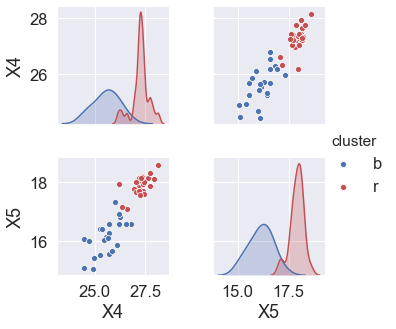

In [19]:
df_extended = df_std[['X4', 'X5']]
df_extended['cluster'] = colors
sns.pairplot(df_extended, hue = 'cluster', palette = ['b', 'r']) #diag_kind = 'hist'

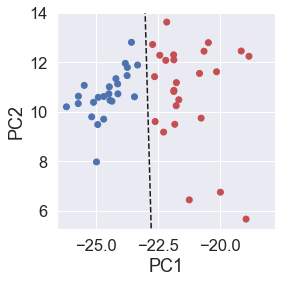

In [12]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_pc[['PC1', 'PC2']])
labels = kmeans.predict(df_pc[['PC1', 'PC2']])

a, b = kmeans.cluster_centers_
mid_point = (a[0:2] + b[0:2])/2
slope = (a[1] - b[1])/(a[0] - b[0])
slope = -1/slope
x = np.array([-22, -24])
y = slope*(x-mid_point[0])+mid_point[1]

colors = []
for i in labels:
    if i == 0:
        colors.append('b')
    else:
         colors.append('r')   

plt.scatter(df_pc["PC1"], df_pc["PC2"], color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("square")
plt.plot(x, y, 'k--')
plt.show()

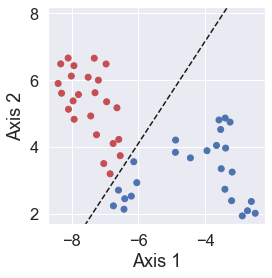

In [13]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(embedding)
labels = kmeans.predict(embedding)

a, b = kmeans.cluster_centers_
mid_point = (a[0:2] + b[0:2])/2
slope = (a[1] - b[1])/(a[0] - b[0])
slope = -1/slope
x = np.array([-10, -2])
y = slope*(x-mid_point[0])+mid_point[1]

colors = []
for i in labels:
    if i == 0:
        colors.append('b')
    else:
         colors.append('r')   

plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.axis("square")
plt.plot(x, y, 'k--')
plt.show()

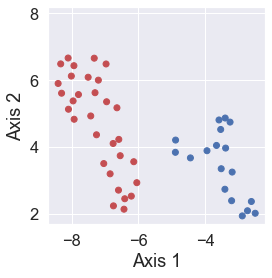

In [14]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 1, min_samples = 5).fit(embedding)
labels = dbsc.labels_
colors = []
for i in labels:
    if i == 0:
        colors.append('r')
    elif i == 1:
        colors.append('b') 
    else:
        colors.append('k')
            
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.axis("square")
plt.show()

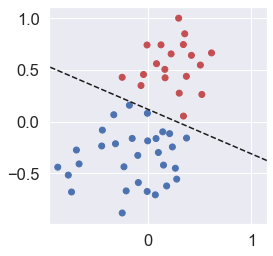

In [15]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(emb2)
labels = kmeans.predict(emb2)

a, b = kmeans.cluster_centers_
mid_point = (a[0:2] + b[0:2])/2
slope = (a[1] - b[1])/(a[0] - b[0])
slope = -1/slope
x = np.array([-10, 10])
y = slope*(x-mid_point[0])+mid_point[1]

colors = []
for i in labels:
    if i == 0:
        colors.append('b')
    else:
         colors.append('r')   

plt.scatter(emb2[:, 0], emb2[:, 1], c=colors)
plt.axis("square")
plt.plot(x, y, 'k--')
plt.show()

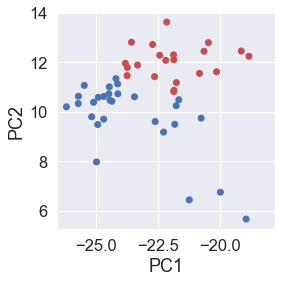

In [16]:
df_rm = df_std.drop(['X4', 'X5'], axis = 1)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_rm)
labels = kmeans.predict(df_rm)

colors = []
for i in labels:
    if i == 0:
        colors.append('r')
    else:
         colors.append('b')   

sns.set(font_scale = 1.5)

plt.scatter(df_pc["PC1"], df_pc["PC2"], color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("square")
# plt.plot(x, y, 'k--', label = 'boundary')
# plt.legend()
plt.show()

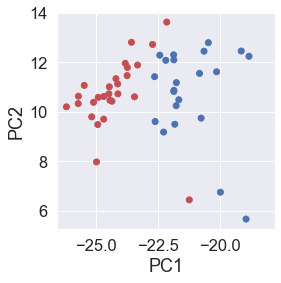

In [17]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_std[['X4', 'X5']])
labels = kmeans.predict(df_std[['X4', 'X5']])

colors = []
for i in labels:
    if i == 0:
        colors.append('r')
    else:
         colors.append('b')   

sns.set(font_scale = 1.5)

plt.scatter(df_pc["PC1"], df_pc["PC2"], color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("square")
# plt.plot(x, y, 'k--', label = 'boundary')
# plt.legend()
plt.show()